In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Data Preparation**

In [62]:
irregularities_path = 'aggregate_median_irregularities_Kota Bandung.csv'
irregularities = pd.read_csv(irregularities_path).drop(['id', 'street', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'jam_level', 'geometry', 'cause_type', 'date', 'median_delay_seconds'], axis=1)
irregularities['time'] = pd.to_datetime(irregularities['time'])
irregularities['median_jam_level'] = irregularities['median_jam_level'].astype(int)
irregularities

,time,median_length,median_regular_speed,total_records,median_seconds,median_speed,median_jam_level
0,2022-07-06 07:00:00,1922.0,15.770000,13,844.0,7.510,4
1,2022-07-06 07:00:00,1819.0,17.939999,2,572.0,11.600,3
2,2022-07-06 07:00:00,1064.0,14.520000,11,675.0,6.140,4
3,2022-07-06 07:00:00,919.0,15.095000,20,632.0,4.970,4
4,2022-07-06 07:00:00,2024.0,15.830000,1,786.0,9.260,3
...,...,...,...,...,...,...,...
11276,2022-09-04 20:00:00,1004.0,18.154999,26,608.5,6.945,4
11277,2022-09-04 20:00:00,1600.0,16.210000,24,817.0,6.950,4
11278,2022-09-04 20:00:00,1600.0,18.025000,20,663.5,8.580,3
11279,2022-09-04 20:00:00,936.5,22.835000,4,605.0,6.130,4


## Check Missing Value

In [63]:
irregularities.isna().sum()

time                    0
median_length           0
median_regular_speed    0
total_records           0
median_seconds          0
median_speed            0
median_jam_level        0
dtype: int64

## Data Splitting

In [64]:
X = irregularities.drop('median_jam_level', axis = 1)
y = irregularities['median_jam_level']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7896, 6), (3385, 6), (7896,), (3385,))

In [67]:
train_set = X_train.merge(y_train, left_index=True, right_index=True)

In [68]:
test_set = X_test.merge(y_test, left_index=True, right_index=True)

# **EDA**

In [69]:
train_set

,time,median_length,median_regular_speed,total_records,median_seconds,median_speed,median_jam_level
4604,2022-07-30 18:00:00,662.0,14.015000,60,681.5,3.49,4
2333,2022-07-18 12:00:00,1872.0,14.780000,41,1135.0,5.99,4
4398,2022-07-29 17:00:00,1749.0,9.020000,9,960.0,6.11,4
3233,2022-07-23 15:00:00,789.0,15.450001,44,661.5,4.23,4
2008,2022-07-16 17:00:00,2640.0,72.110000,15,482.0,20.26,3
...,...,...,...,...,...,...,...
5734,2022-08-06 11:00:00,1090.0,16.980000,1,678.0,5.78,3
5191,2022-08-03 07:00:00,797.0,18.930000,6,396.0,7.24,3
5390,2022-08-04 15:00:00,1064.0,23.620000,3,228.0,16.75,2
860,2022-07-11 12:00:00,994.0,14.150000,5,464.0,7.70,4


### median_length distribution

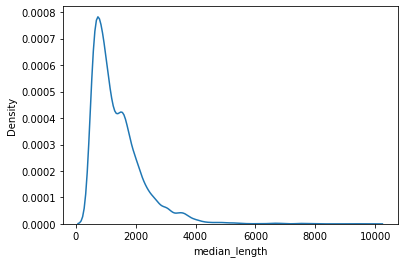

In [70]:
sns.kdeplot(data=train_set, x= 'median_length');

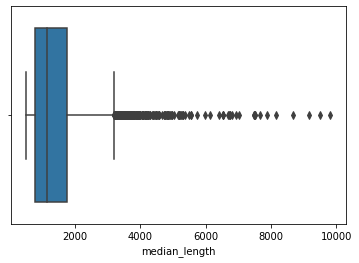

In [71]:
sns.boxplot(data = train_set, x = 'median_length');

### median_regular_speed distribution

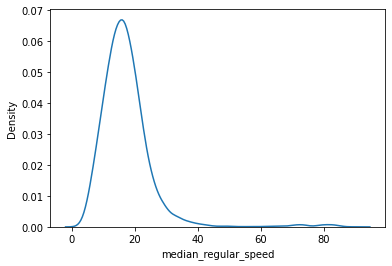

In [72]:
sns.kdeplot(data=train_set, x= 'median_regular_speed')

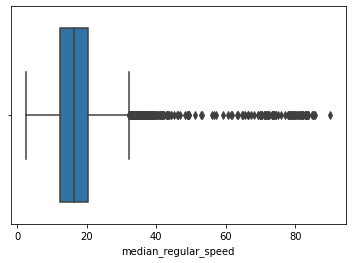

In [73]:
sns.boxplot(data = train_set, x = 'median_regular_speed');

### total_records distribution

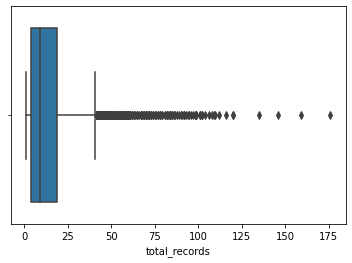

In [74]:
sns.boxplot(data = train_set, x = 'total_records');

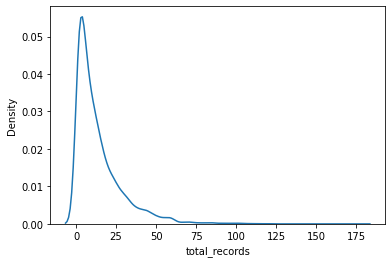

In [75]:
sns.kdeplot(data=train_set, x= 'total_records');

### median_seconds distribution

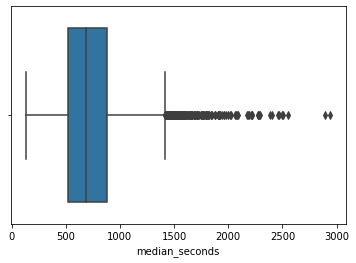

In [76]:
sns.boxplot(data = train_set, x = 'median_seconds');

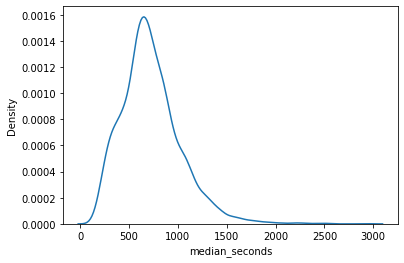

In [77]:
sns.kdeplot(data=train_set, x= 'median_seconds');

### median_speed distribution

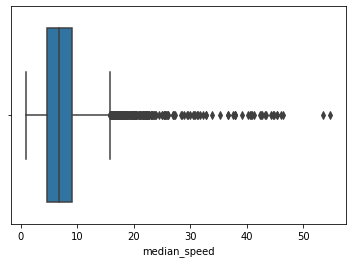

In [78]:
sns.boxplot(data = train_set, x = 'median_speed');

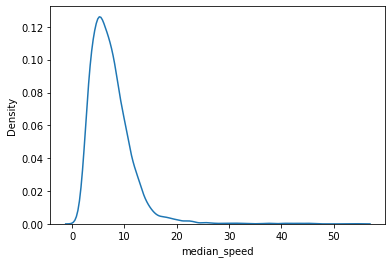

In [79]:
sns.kdeplot(data=train_set, x= 'median_speed');

### median_jam_level category count

In [80]:
len(train_set['median_jam_level'].unique())

4

## Pairplot

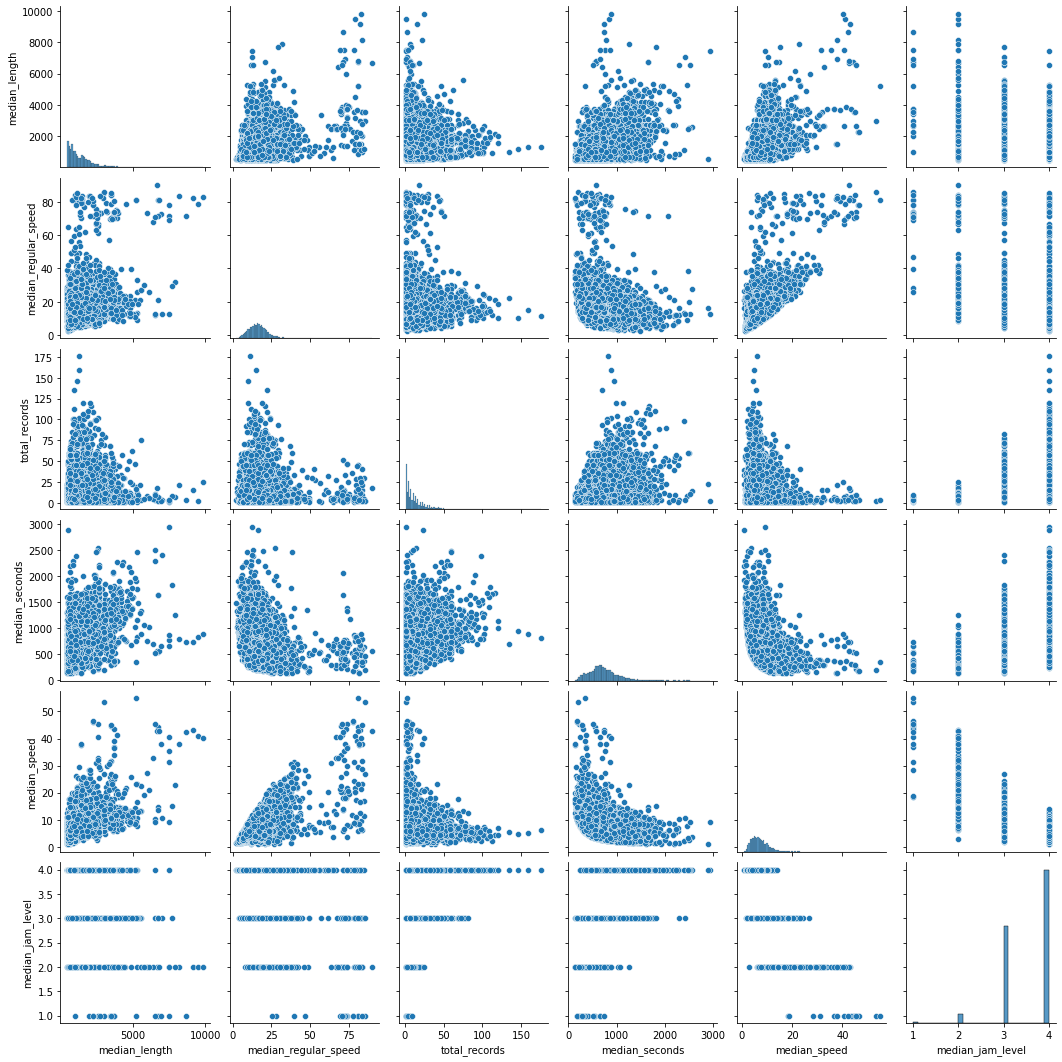

In [81]:
sns.pairplot(train_set);

## Heatmap

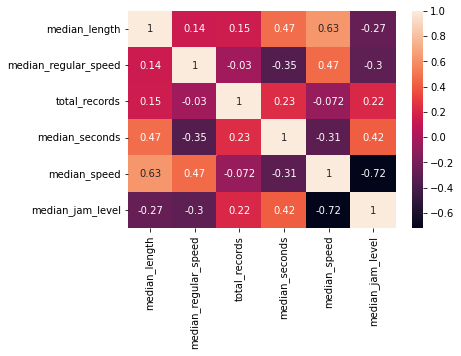

In [82]:
sns.heatmap(train_set.corr(method='spearman'), annot=True);

# **Preprocessing**

## Removing Outlier

In [83]:
# train_set
train_set_num = train_set[['median_length', 'median_regular_speed', 'total_records', 'median_seconds', 'median_speed']].copy()
list_of_set_data = list()

for col_name in train_set_num.columns[:-1]:
  q1 = train_set_num[col_name].quantile(0.25)
  q3 = train_set_num[col_name].quantile(0.75)
  iqr = q3 - q1
  train_set_num_cleaned = train_set_num[~((train_set_num[col_name] < (q1 - 1.5 * iqr)) | (train_set_num[col_name] > (q3 + 1.5 * iqr)))].copy()
  list_of_set_data.append(train_set_num_cleaned.copy())

train_set_num_cleaned = pd.concat(list_of_set_data)
count_duplicated_index = train_set_num_cleaned.index.value_counts()
used_index_data = count_duplicated_index[count_duplicated_index == (train_set_num.shape[1]-1)].index
train_set_num_cleaned = train_set_num_cleaned.loc[used_index_data].drop_duplicates()

train_set_num_cleaned.shape

(6796, 5)

In [84]:
# test_set
test_set_num = test_set[['median_length', 'median_regular_speed', 'total_records', 'median_seconds', 'median_speed']].copy()
list_of_set_data = list()

for col_name in test_set_num.columns[:-1]:
  test_set_num_cleaned = test_set_num[~((test_set_num[col_name] < (q1 - 1.5 * iqr)) | (test_set_num[col_name] > (q3 + 1.5 * iqr)))].copy()
  list_of_set_data.append(test_set_num_cleaned.copy())

test_set_num_cleaned = pd.concat(list_of_set_data)
count_duplicated_index = test_set_num_cleaned.index.value_counts()
used_index_data = count_duplicated_index[count_duplicated_index == (test_set_num.shape[1]-1)].index
test_set_num_cleaned = test_set_num_cleaned.loc[used_index_data].drop_duplicates()

test_set_num_cleaned.shape

(2043, 5)

## Converting Datetime

In [85]:
# train_set

train_set_dt = pd.DataFrame(train_set['time'].copy())
train_set_dt_converted = pd.DataFrame()

train_set_dt_converted['month'] = train_set_dt['time'].dt.month
train_set_dt_converted['day'] = train_set_dt['time'].dt.day
train_set_dt_converted['weekday'] = train_set_dt['time'].dt.weekday
train_set_dt_converted['hour'] = train_set_dt['time'].dt.hour

train_set_dt_converted.sample(5)

,month,day,weekday,hour
7058,8,13,5,12
8527,8,19,4,18
8245,8,19,4,15
4790,7,31,6,18
5086,8,2,1,14


In [86]:
# test_set

test_set_dt = pd.DataFrame(test_set['time'].copy())
test_set_dt_converted = pd.DataFrame()

test_set_dt_converted['month'] = test_set_dt['time'].dt.month
test_set_dt_converted['day'] = test_set_dt['time'].dt.day
test_set_dt_converted['weekday'] = test_set_dt['time'].dt.weekday
test_set_dt_converted['hour'] = test_set_dt['time'].dt.hour

test_set_dt_converted.sample(5)

,month,day,weekday,hour
7525,8,15,0,16
3247,7,23,5,16
2239,7,18,0,6
673,7,8,4,19
9476,8,27,5,10


## Merge

In [87]:
train_set_cc = train_set_num_cleaned.merge(train_set_dt_converted, how='inner', left_index=True, right_index=True).merge(y_train, how='inner', left_index=True, right_index=True)

In [88]:
test_set_cc = test_set_num_cleaned.merge(test_set_dt_converted, how='inner', left_index=True, right_index=True).merge(y_test, how='inner', left_index=True, right_index=True)

In [89]:
X_train = train_set_cc.drop('median_jam_level', axis=1)
y_train = train_set_cc['median_jam_level']

In [90]:
X_test = test_set_cc.drop('median_jam_level', axis=1)
y_test = test_set_cc['median_jam_level']

## Pairplot

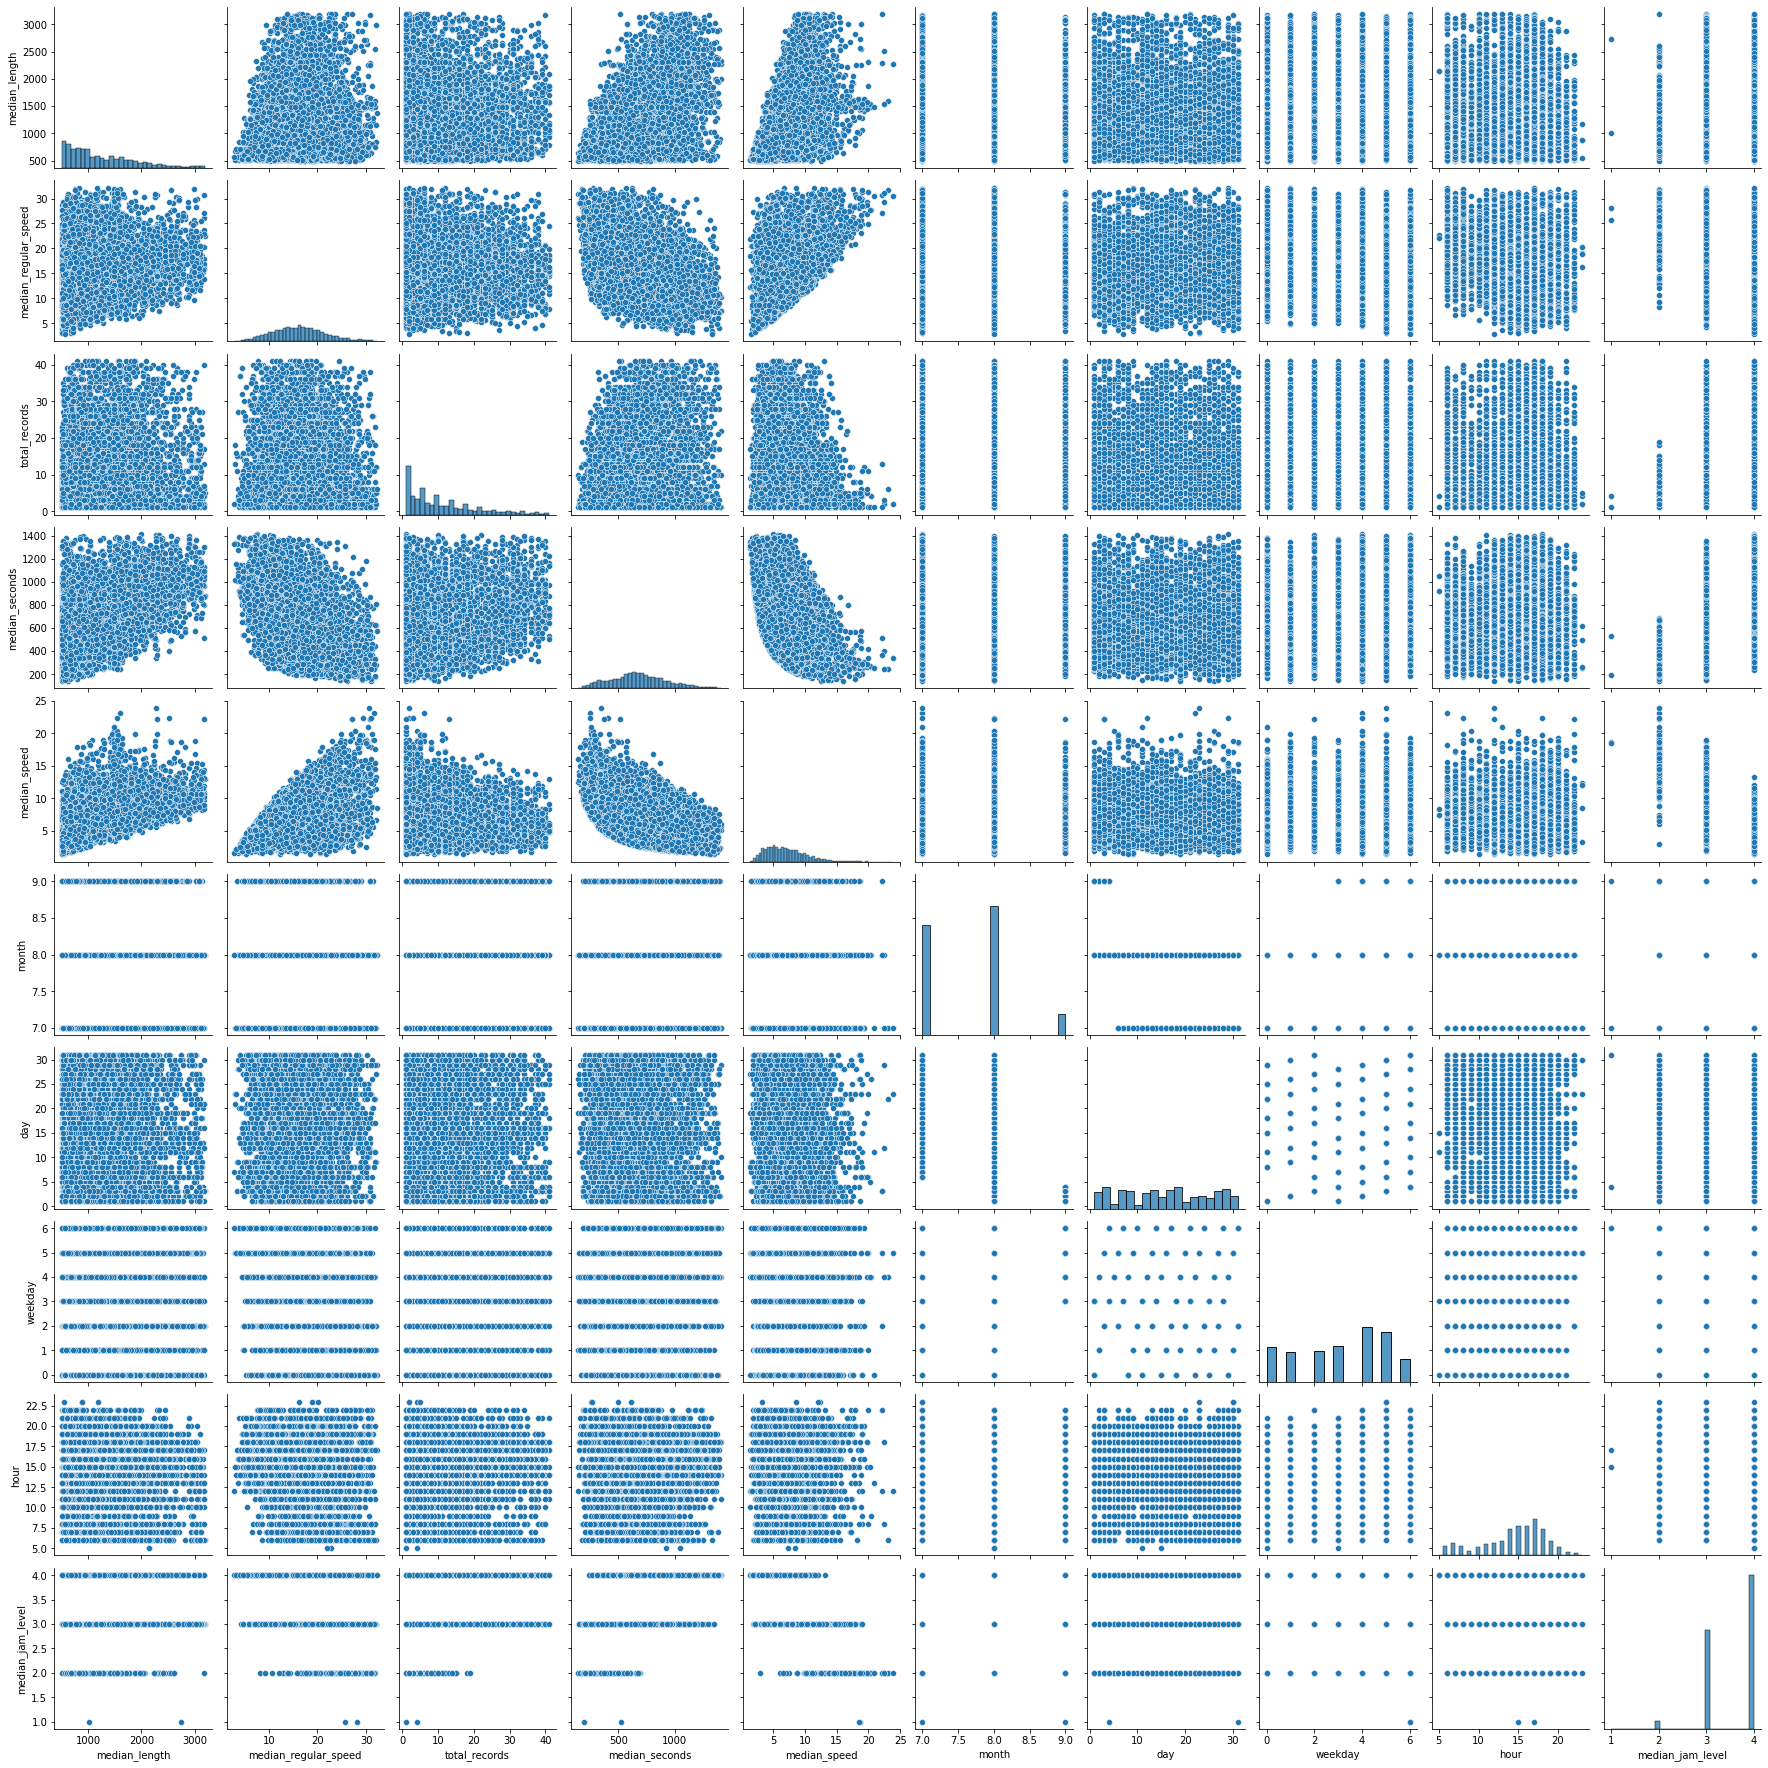

In [91]:
sns.pairplot(train_set_cc);

## Heatmap

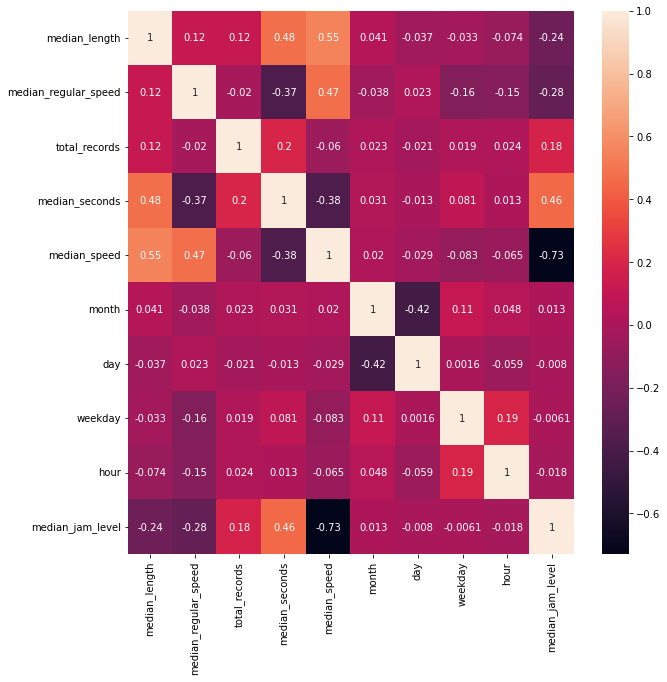

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set_cc.corr(), annot=True)

# **Modeling**

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

In [94]:
# decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
f1_score(y_test, y_pred_dtc, average='weighted')

0.8263235949062822

In [95]:
# svm
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
f1_score(y_test, y_pred_svc, average='weighted')

0.8380430564661641

In [96]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
f1_score(y_test, y_pred_rf, average='weighted')

0.8795122026890205

In [97]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[2,8,10,12,18,20]}
GS = GridSearchCV(estimator=dtc, param_grid=params, cv=5, n_jobs=-1, verbose=True)
GS.fit(X_train, y_train)

print('Best Parameters:', GS.best_params_,end='\n\n')
print('Best Score:', GS.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 12}

Best Score: 0.841817729299225


In [98]:
# decision tree optimized
dtc_optimized = DecisionTreeClassifier(**GS.best_params_)
dtc_optimized.fit(X_train, y_train)
y_pred_dtc_o = dtc_optimized.predict(X_test)

f1_score(y_test, y_pred_dtc_o, average='weighted')

0.863317541455491

# **Evaluation**

## Value Count

In [99]:
# actual
y_test.value_counts()

4    1361
3     624
2      56
1       2
Name: median_jam_level, dtype: int64

In [100]:
# decision tree
pd.Series(y_pred_dtc.astype(int)).value_counts()

4    1357
3     630
2      54
1       2
dtype: int64

In [101]:
# svm
pd.Series(y_pred_svc.astype(int)).value_counts()

4    1412
3     631
dtype: int64

In [102]:
# random forest
pd.Series(y_pred_rf.astype(int)).value_counts()

4    1406
3     586
2      50
1       1
dtype: int64

In [103]:
# decision tree optimized
pd.Series(y_pred_dtc_o.astype(int)).value_counts()

4    1320
3     667
2      56
dtype: int64